In [1]:
from ParaTune.light.GaussianPulse import GaussianPulse
from ParaTune.light.Beam import Beam
from ParaTune.media.SPDCCrystal import SPDCCrystal
from ParaTune.interactions.InteractionSPDC import InteractionSPDC
from ParaTune.optimization.GA import GA
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import c, hbar, epsilon_0

In [10]:
# general crystal parameters
crystal_spdc_normal = SPDCCrystal(
    configuration='random', # Periodically poled lithium niobate
    medium='KTP', # Medium
    number_grid_points_z=4000, # Number of grid points in z direction
    wavelength_central=791e-9, # Central wavelength in meters
    pump='y', # Polarization of the pump wave
    signal='x', # Polarization of the signal wave
    idler='y', # Polarization of the idler wave
    length=1.1e-3,
    ) # Length of the crystal in meters

parameters_spdc_normal = np.array(crystal_spdc_normal.poling_function(np.array(crystal_spdc_normal.domain_values)), dtype=np.float32)[:len(crystal_spdc_normal.z_grid)]

bandwidth = 5e-9
wavelength_span = 15*bandwidth
number_of_grid_points = (int)(wavelength_span / (2*crystal_spdc_normal.discretization_step_z))
print(f'Number of grid points: {number_of_grid_points}')
print(f'Wavelength span: {wavelength_span}')
# Gaussian pulse
gaussian = GaussianPulse(
    wavelength_central=791e-9,  # Central wavelength in meters
    wavelength_bandwidth=30e-9,  # Bandwidth in meters
    mean_power=200,  # Mean power in Watts
    repetition_rate=61e6,  # Repetition rate in Hz
    number_of_grid_points=240, # Number of grid points
    wavelength_span=240e-9,  # Wavelength span in meters
    refractive_index_function=crystal_spdc_normal.n_p # Refractive index function
)

simulation_spdc1D = InteractionSPDC(
    gaussian.wavelength_central, 
    (gaussian.frequency_grid[-1]-gaussian.frequency_grid[0])*2*np.pi, 
    crystal_spdc_normal.length,
    gaussian.number_of_grid_points, 
    crystal_spdc_normal.number_grid_points_z, 
    crystal_spdc_normal.n_p, 
    crystal_spdc_normal.n_s,
    crystal_spdc_normal.n_i,
    crystal_spdc_normal.k_p, 
    crystal_spdc_normal.k_s,
    crystal_spdc_normal.k_i, 
    crystal_spdc_normal.wavevector_mismatch,
    crystal_spdc_normal.deff, 
    crystal_spdc_normal.domain_bounds, 
    gaussian.frequency_bandwidth,
    dimensions=1)

domain_width/2 = 3.671642492398608e-06 
dictretization step along z = 2.75e-07
Number of grid points: 0
Wavelength span: 7.5e-08


In [11]:
Ap, As_out, Ai_out, As_vac, Ai_vac, Ep, Es, Ei, As_evolution_z, Ai_evolution_z = simulation_spdc1D.run(gaussian.frequency_amplitude, parameters_spdc_normal)

Propagation steps: 100%|██████████| 4000/4000 [00:02<00:00, 1642.12it/s]


/Users/macoco/Desktop/colin_ecole/polymtl/polymtl_MA1/maîtrise/PPLN/simulations/.venv3_10/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/macoco/Desktop/colin_ecole/polymtl/polymtl_MA1/maîtrise/PPLN/simulations/.venv3_10/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dpi" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/macoco/Desktop/colin_ecole/polymtl/polymtl_MA1/maîtrise/PPLN/simulations/.venv3_10/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.

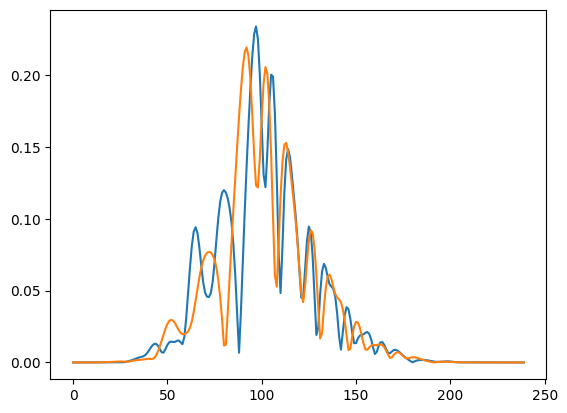

In [12]:
plt.plot(np.abs(As_out)/np.linalg.norm(np.abs(As_out)))
plt.plot(np.abs(Ai_out)/np.linalg.norm(np.abs(Ai_out)))

GENERATION 04
	 - Population length: 5
	 - Avg. Fitness: -0.003517
	 - Avg. Length: 0.001552
	 - Best Crystal
		 -> length: 0.0016889555465033597
		 -> fitness: (-0.001165)
	 - Worst Crystal
		 -> length: 0.0019165973810320732
		 -> fitness: (-0.007483)


/Users/macoco/Desktop/colin_ecole/polymtl/polymtl_MA1/maîtrise/PPLN/simulations/.venv3_10/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/macoco/Desktop/colin_ecole/polymtl/polymtl_MA1/maîtrise/PPLN/simulations/.venv3_10/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dpi" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/macoco/Desktop/colin_ecole/polymtl/polymtl_MA1/maîtrise/PPLN/simulations/.venv3_10/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.

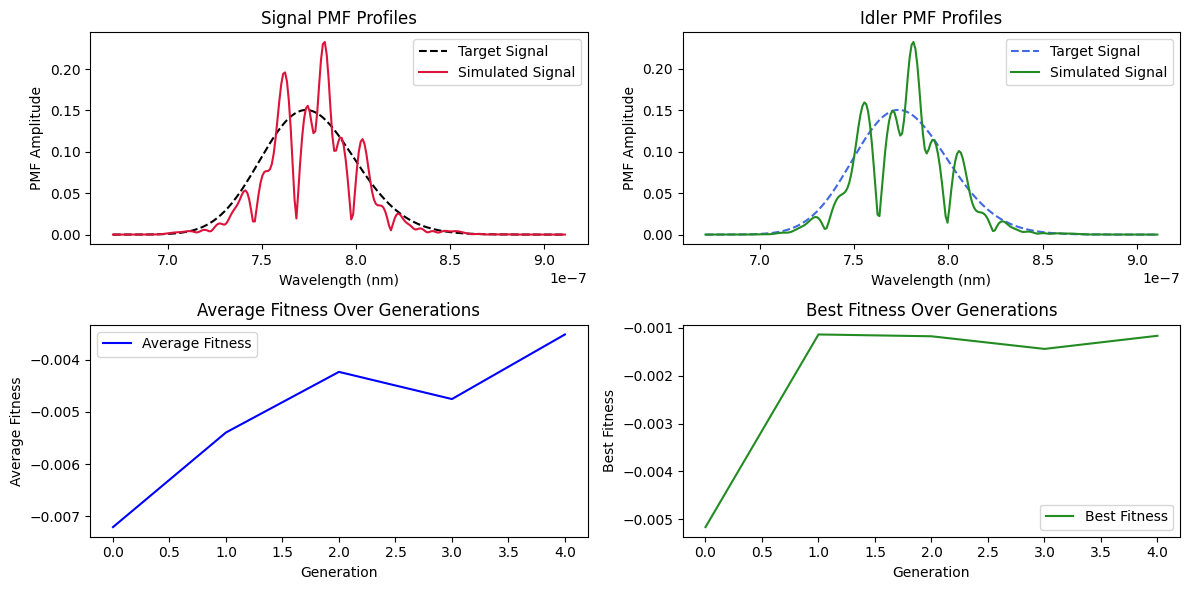

domain_width/2 = 3.671642492398608e-06 
dictretization step along z = 3.304478243158747e-07
domain_width/2 = 3.671642492398608e-06 
dictretization step along z = 4.901642727352142e-07


Evolution Progress: 100%|██████████| 5/5 [01:06<00:00, 13.25s/it]


In [7]:
# --- crytsal parameter ---
# minimal / maximal crystal length
min_length = 1e-3 # [m]
max_length = 2e-3 # [m]
configuration='ppln' # Periodically poled lithium niobate
medium='KTP' # Medium
number_grid_points_z=4000 # Number of grid points in z direction
wavelength_central=791e-9 # Central wavelength in meters
pump='y' # Polarization of the pump wave
signal='x' # Polarization of the signal wave
idler='y' # Polarization of the idler wave
domain_width = None
# --- pump parameters ---
number_grid_points_freq = gaussian.number_of_grid_points
freq_bandwidth = gaussian.frequency_bandwidth
freq_span = np.abs(gaussian.frequency_grid[-1]-gaussian.frequency_grid[0])
wavelength_central = gaussian.wavelength_central
wavelength_array = gaussian.wavelength_grid
target = gaussian.frequency_amplitude
pump_amplitude_freq = gaussian.frequency_amplitude
# initialization option
option = "ppln"
# size of the population
size = 5
# number of iterations
nb_generation = 5
# uniform crossover probability
Pu1 = 0.9
Pu2 = 0.9
# weight coefficient for mutation
weight_Pm = 1
# single-point crossover probability
Ps = 0.9
nb_level = []
restart = None
restart_depth = 990
mode = 1
# instance of GA
ga = GA(size, option, Ps, Pu1, Pu2,weight_Pm,
        max_length, min_length, number_grid_points_z, 
        number_grid_points_freq, freq_span, pump_amplitude_freq, 
        freq_bandwidth, medium, wavelength_central, wavelength_array,
        pump, signal, idler, target, domain_width=domain_width)
# run GA
p2, i = ga.run_evolution(nb_generation, printer=True, nb_level=nb_level, restart=restart, restart_depth=restart_depth)

/Users/macoco/Desktop/colin_ecole/polymtl/polymtl_MA1/maîtrise/PPLN/simulations/.venv3_10/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/macoco/Desktop/colin_ecole/polymtl/polymtl_MA1/maîtrise/PPLN/simulations/.venv3_10/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dpi" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/macoco/Desktop/colin_ecole/polymtl/polymtl_MA1/maîtrise/PPLN/simulations/.venv3_10/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.

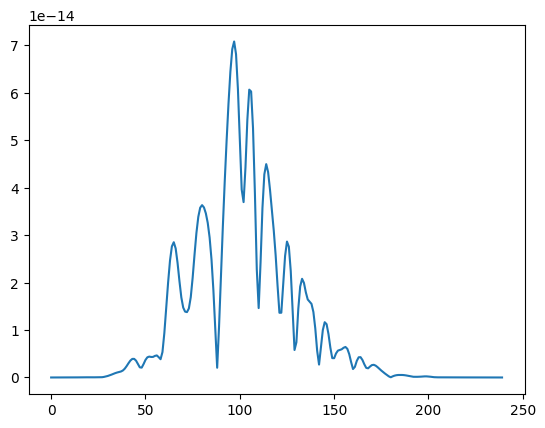

In [9]:
plt.plot(np.abs(p2[0].signal_spectrum))